In [1]:
import pandas as pd
import numpy as np

In [2]:
X=pd.read_csv('./Air_Pollution_Train.csv').values

In [3]:
y=X[:,5]
y=np.array(y)
y.shape

(1600,)

In [4]:
X=X[:,:5]
X.shape

(1600, 5)

In [5]:
#print(X)

(1600, 5)

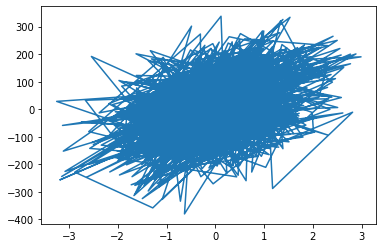

In [6]:
import matplotlib.pyplot as plt
plt.plot(X[:,3],y[:])
X.shape


In [7]:
x=(X-X.mean())/X.std()
print(X)

[[ 0.29341624 -0.94559871 -0.42110515  0.40681602  0.52566183]
 [-0.83608408 -0.18922804 -0.77640262 -1.05383124  0.59799685]
 [ 0.23642511  0.13283602 -0.14772298  0.69985396 -0.18736416]
 ...
 [ 1.04417694 -0.89920649  1.73039905 -1.87105676  0.44251965]
 [-1.2691729  -0.00505216  1.85766873 -1.08036482  0.73633394]
 [-1.88400025 -0.84942743 -1.45227035  0.48861308  1.4595758 ]]


In [8]:
def hypothesis(X,theta):
    return np.dot(X,theta)
def error(X,y,theta):
    error=0.0
    m=X.shape[0]
    y_=hypothesis(X,theta)
    error=np.sum((y-y_)**2)
    return error/m
def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    return grad/m
def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    for i in range(max_iters):
        e=error(X,y,theta)
        error_list.append(e)
        
        #gradient descent
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list
        
    


In [9]:
m=x.shape[0]
a=np.ones((m,1))
x=np.hstack((a,x))
theta , error_list=gradient_descent(x,y)
theta

array([ 1.49138699, 29.84297081, 93.16540718,  8.32556432, 45.01071403,
        2.53283406])

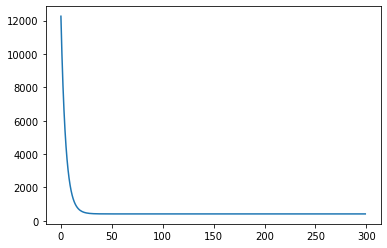

In [10]:
plt.plot(error_list)
#print(error_list)

In [11]:
x_test=pd.read_csv('./air_pollution_Test.csv').values
x_test.shape
a=np.ones((x_test.shape[0],1))
x_test=np.hstack((a,x_test))
print(x_test.shape,theta.shape)

(400, 6) (6,)


In [12]:

m=x.shape[0]
a=np.ones((m,1))
X=np.hstack((a,X))


In [23]:
y_=hypothesis(x_test,theta)


In [24]:
df=pd.DataFrame(data=y_,columns=["target"])
df.insert(loc=0, column='Id', value=np.arange(len(df)))
df.to_csv('air_pollution_y1_prediction.csv',index=False)


In [21]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    den=np.sum((y-y.mean())**2)
    score=(1-num/den)
    #print(num,den,score)
    return score*100

In [22]:
y_=hypothesis(X,theta)

print(r2_score(y,y_))

96.50517055030589
